In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from perceptron import Model_original
%matplotlib inline

In [3]:
# load data
iris = load_iris() # 鸢尾花数据集
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

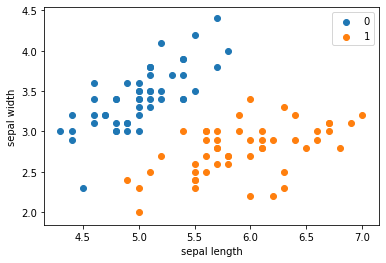

In [5]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [6]:
data = np.array(df.iloc[:100, [0, 1, -1]])

In [7]:
X, y = data[:,:-1], data[:,-1]
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
y = np.array([1 if i == 1 else -1 for i in y]) # 转换为感知机输出空间:{-1, 1}
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [9]:
perceptron = Model_original()
perceptron.fit(X, y)

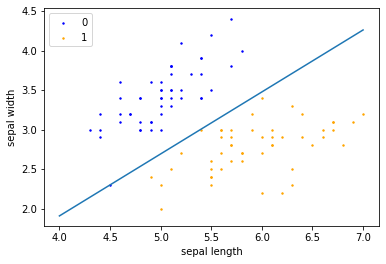

In [10]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_) # 作图分离超平面

plt.scatter(data[:50, 0], data[:50, 1], color='blue', label='0', s=2)
plt.scatter(data[50:100, 0], data[50:100, 1], color='orange', label='1', s=2)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
